In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('D:/A CNSH/230602 - M02ML02/data/Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [109]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [110]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

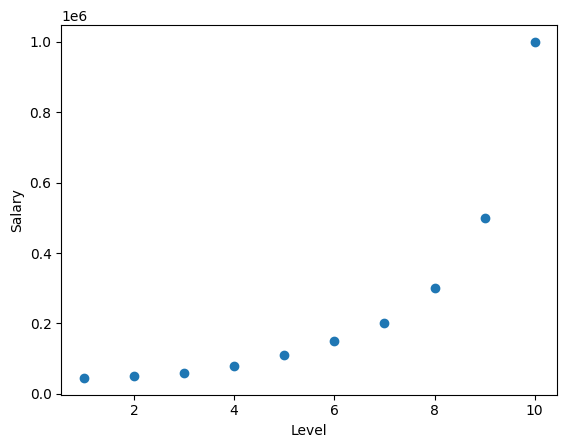

In [111]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

Câu hỏi 3 Định nghĩa hàm tính hệ số xác định (Coefficient of determination) để đánh giá tính hiệu
quả của mô hình hồi quy tuyến tính
Hệ số xác định (R2
) được xác định dựa vào công thức sau:

R
2 = 1 −
Pn
i=1(yi − ybi)
2
Pn
i=1(yi − y)
2

#2.Linear Regression

In [112]:
import numpy as np 
def r2score(y_pred, y):
    rss = np.sum((y_pred-y)**2)
    tss = np.sum((y-y.mean())**2)
    r2 = 1 - (rss/tss)
    return r2

In [113]:
# class LinearRegression :
#     def __init__ ( self , X_data , y_target , learning_rate =0.01 , num_epochs =10000) :
#         self . X_data = X_data # Shape : ( num_samples , num_features )
#         self . y_target = y_target # Shape : ( num_samples , )
#         self . learning_rate = learning_rate
#         self . num_epochs = num_epochs
#         self . num_samples = self . X_data . shape [0]

#     # Initial Coefficients
#         self . theta = np . random . randn ( self . X_data . shape [1])
#         self . losses = []

#     def compute_loss ( self , y_pred , y_target ) :
#         loss = ( y_pred - y_target ) *( y_pred - y_target )
#         loss = np . mean ( loss )
#         return loss

#     def predict ( self , X_data ) :
#         y_pred = X_data . dot ( self . theta )
#         return y_pred

#     def fit ( self ) :
#         for epoch in range ( self . num_epochs ) :
#             y_pred = self . predict ( self . X_data )
            
#             loss = self . compute_loss ( y_pred , self . y_target )
#             self . losses . append ( loss )

#             k = 2*( y_pred - self . y_target )
#             gradients = self . X_data . T . dot ( k ) / self . num_samples

#             self . theta = self . theta - self . learning_rate * gradients

#             print ( f'Epoch : { epoch } - Loss : { loss }')

#         return {
#             'loss ': sum( self . losses ) /len( self . losses ) ,
#             'weight ': self . theta
#         }


In [114]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [115]:
X_linear = X.values.reshape(-1, 1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))

In [116]:
X_linear 

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [117]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Epoch: 0 - Loss: 142913186183.5948
Epoch: 1 - Loss: 40361235932.51042
Epoch: 2 - Loss: 35586160774.75503
Epoch: 3 - Loss: 35297815098.44286
Epoch: 4 - Loss: 35215907528.46313
Epoch: 5 - Loss: 35144047256.126305
Epoch: 6 - Loss: 35073218763.27838
Epoch: 7 - Loss: 35003003620.85453
Epoch: 8 - Loss: 34933377886.73778
Epoch: 9 - Loss: 34864335758.202835
Epoch: 10 - Loss: 34795872304.21408
Epoch: 11 - Loss: 34727982672.82808
Epoch: 12 - Loss: 34660662054.50028
Epoch: 13 - Loss: 34593905680.07646
Epoch: 14 - Loss: 34527708820.37856
Epoch: 15 - Loss: 34462066785.865944
Epoch: 16 - Loss: 34396974926.303116
Epoch: 17 - Loss: 34332428630.43029
Epoch: 18 - Loss: 34268423325.636658
Epoch: 19 - Loss: 34204954477.636497
Epoch: 20 - Loss: 34142017590.147938
Epoch: 21 - Loss: 34079608204.57445
Epoch: 22 - Loss: 34017721899.688972
Epoch: 23 - Loss: 33956354291.320686
Epoch: 24 - Loss: 33895501032.044456
Epoch: 25 - Loss: 33835157810.872894
Epoch: 26 - Loss: 33775320352.950817
Epoch: 27 - Loss: 33715984

{'loss': 26812264134.145786,
 'weight': array([-195333.33333333,   80878.78787879])}

In [120]:
y_pred = linear_model.predict(X_linear)

In [121]:
r2score(y_pred, y)

0.6690412331929895

In [122]:
linear_model.theta

array([-195333.33333333,   80878.78787879])

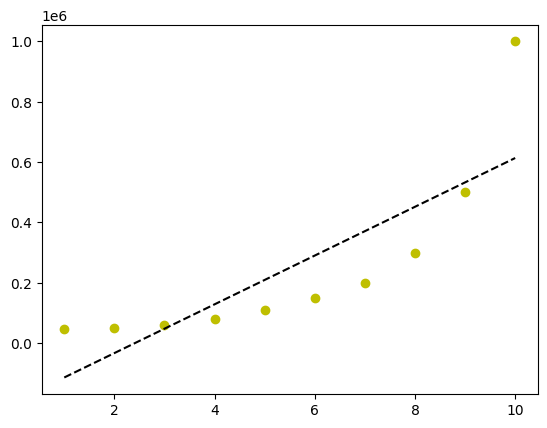

In [126]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

3.polynominal regression

In [ ]:
def create_polynomial_features(X, degree=2):
    '''Create the polynominal features
    Args:
        X: A torch tensor for the data, 
        degree: A intege for the degree of 
        the generated polynomial function.
    '''
    X_new = X 
    for d in range(2, degree+1):
        X_new = np.c_[(X_new, np.power(X, d))]
    return X_new


In [127]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]], dtype=int64)

In [128]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [129]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Epoch: 0 - Loss: 142969335868.5143
Epoch: 1 - Loss: 45682226637.112686
Epoch: 2 - Loss: 22700496418.64053
Epoch: 3 - Loss: 17268778479.03187
Epoch: 4 - Loss: 15982159552.13261
Epoch: 5 - Loss: 15674565481.50553
Epoch: 6 - Loss: 15598208839.649622
Epoch: 7 - Loss: 15576471512.373524
Epoch: 8 - Loss: 15567638488.815731
Epoch: 9 - Loss: 15561857196.915167
Epoch: 10 - Loss: 15556800577.232138
Epoch: 11 - Loss: 15551919003.017553
Epoch: 12 - Loss: 15547082655.069538
Epoch: 13 - Loss: 15542260867.523392
Epoch: 14 - Loss: 15537446393.306616
Epoch: 15 - Loss: 15532637516.57931
Epoch: 16 - Loss: 15527833827.914509
Epoch: 17 - Loss: 15523035226.448313
Epoch: 18 - Loss: 15518241684.200048
Epoch: 19 - Loss: 15513453190.407623
Epoch: 20 - Loss: 15508669738.380268
Epoch: 21 - Loss: 15503891322.39325
Epoch: 22 - Loss: 15499117936.954468
Epoch: 23 - Loss: 15494349576.631245
Epoch: 24 - Loss: 15489586236.009373
Epoch: 25 - Loss: 15484827909.683472
Epoch: 26 - Loss: 15480074592.254675
Epoch: 27 - Loss: 

{'loss': 11093686211.815378,
 'weight': array([ 14601.7489014 , -47838.47366254,  12584.36964553])}

In [130]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8736083757858347

In [131]:
poly_model.theta

array([ 14601.7489014 , -47838.47366254,  12584.36964553])